This file generates and displays PCA plots for various data subsets.

In [1]:
# parameters
n_processes = 6
sscodes = 'data/formatted_sscodes.pkl'

In [ ]:
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo
from IPython.display import display
from backend import clustering
from tools.io import unpickle_data
from tools.pandas_mask import build_mask
%matplotlib inline

2025-08-25 14:47:06.501736: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 14:47:06.523494: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-25 14:47:06.523522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-25 14:47:06.524351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-25 14:47:06.528419: I tensorflow/core/platform/cpu_feature_guar

In [3]:
sscodes = unpickle_data(sscodes, False)
masks = [('sunset',
    {'&': {
        'sunset_rule': [("hours_from_closest_sunset", '[)', timedelta(hours=-1), timedelta(hours=1))],
    }
    }),
    ('sunset_date',
        {
            '&': {
            'sunset_rule': [("hours_from_closest_sunset", '[)', timedelta(hours=-1), timedelta(hours=1))],
            '&': [('datetime', '>=', datetime(2023, 4, 1, tzinfo=ZoneInfo("Australia/Brisbane"))),
                    ('datetime', '<=', datetime(2023, 4, 3, tzinfo=ZoneInfo("Australia/Brisbane")))]
            }
        })
]
output_figs = {}
for mask_name, mask in masks:
    new_data = {}
    for name, data in sscodes.items():
        if mask:
            built_mask = build_mask(data, mask)
            new = data[built_mask.mask].copy()
        else:
            new = data

        new_data[f"{mask_name}_{name}"] = new.reset_index()

    clustering.convert_sountrap_strings_to_int(new_data)
    pca_clusters = clustering.clustering(new_data, n_processes)
    output_figs[mask_name] = pca_clusters

PCA plot for sunset_broad band with sunset mask


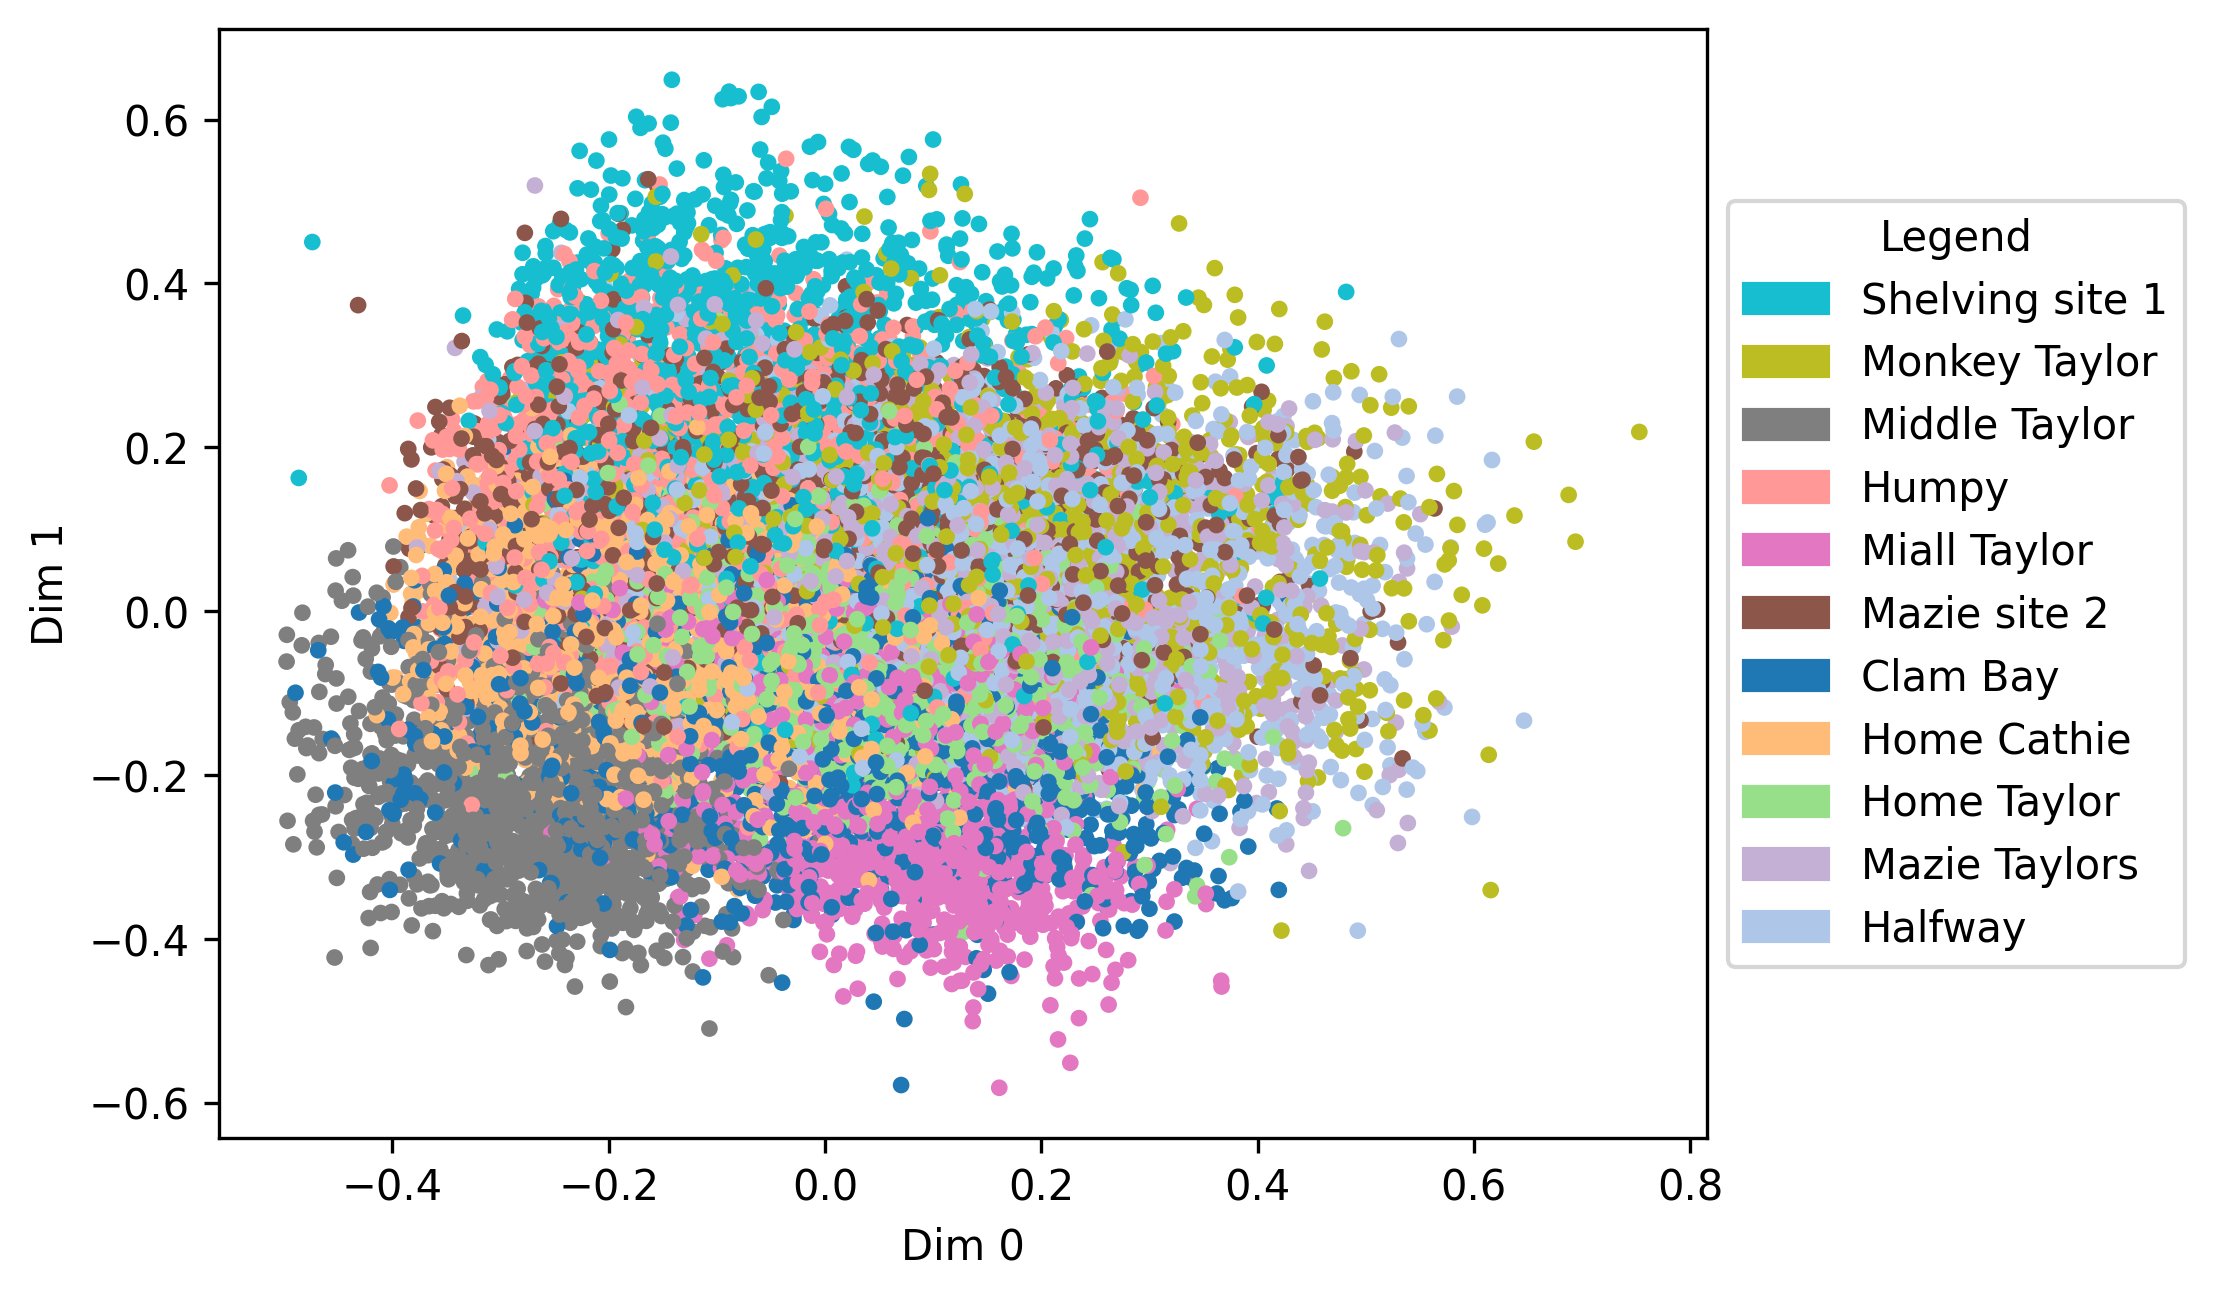

PCA plot for sunset_fish band with sunset mask


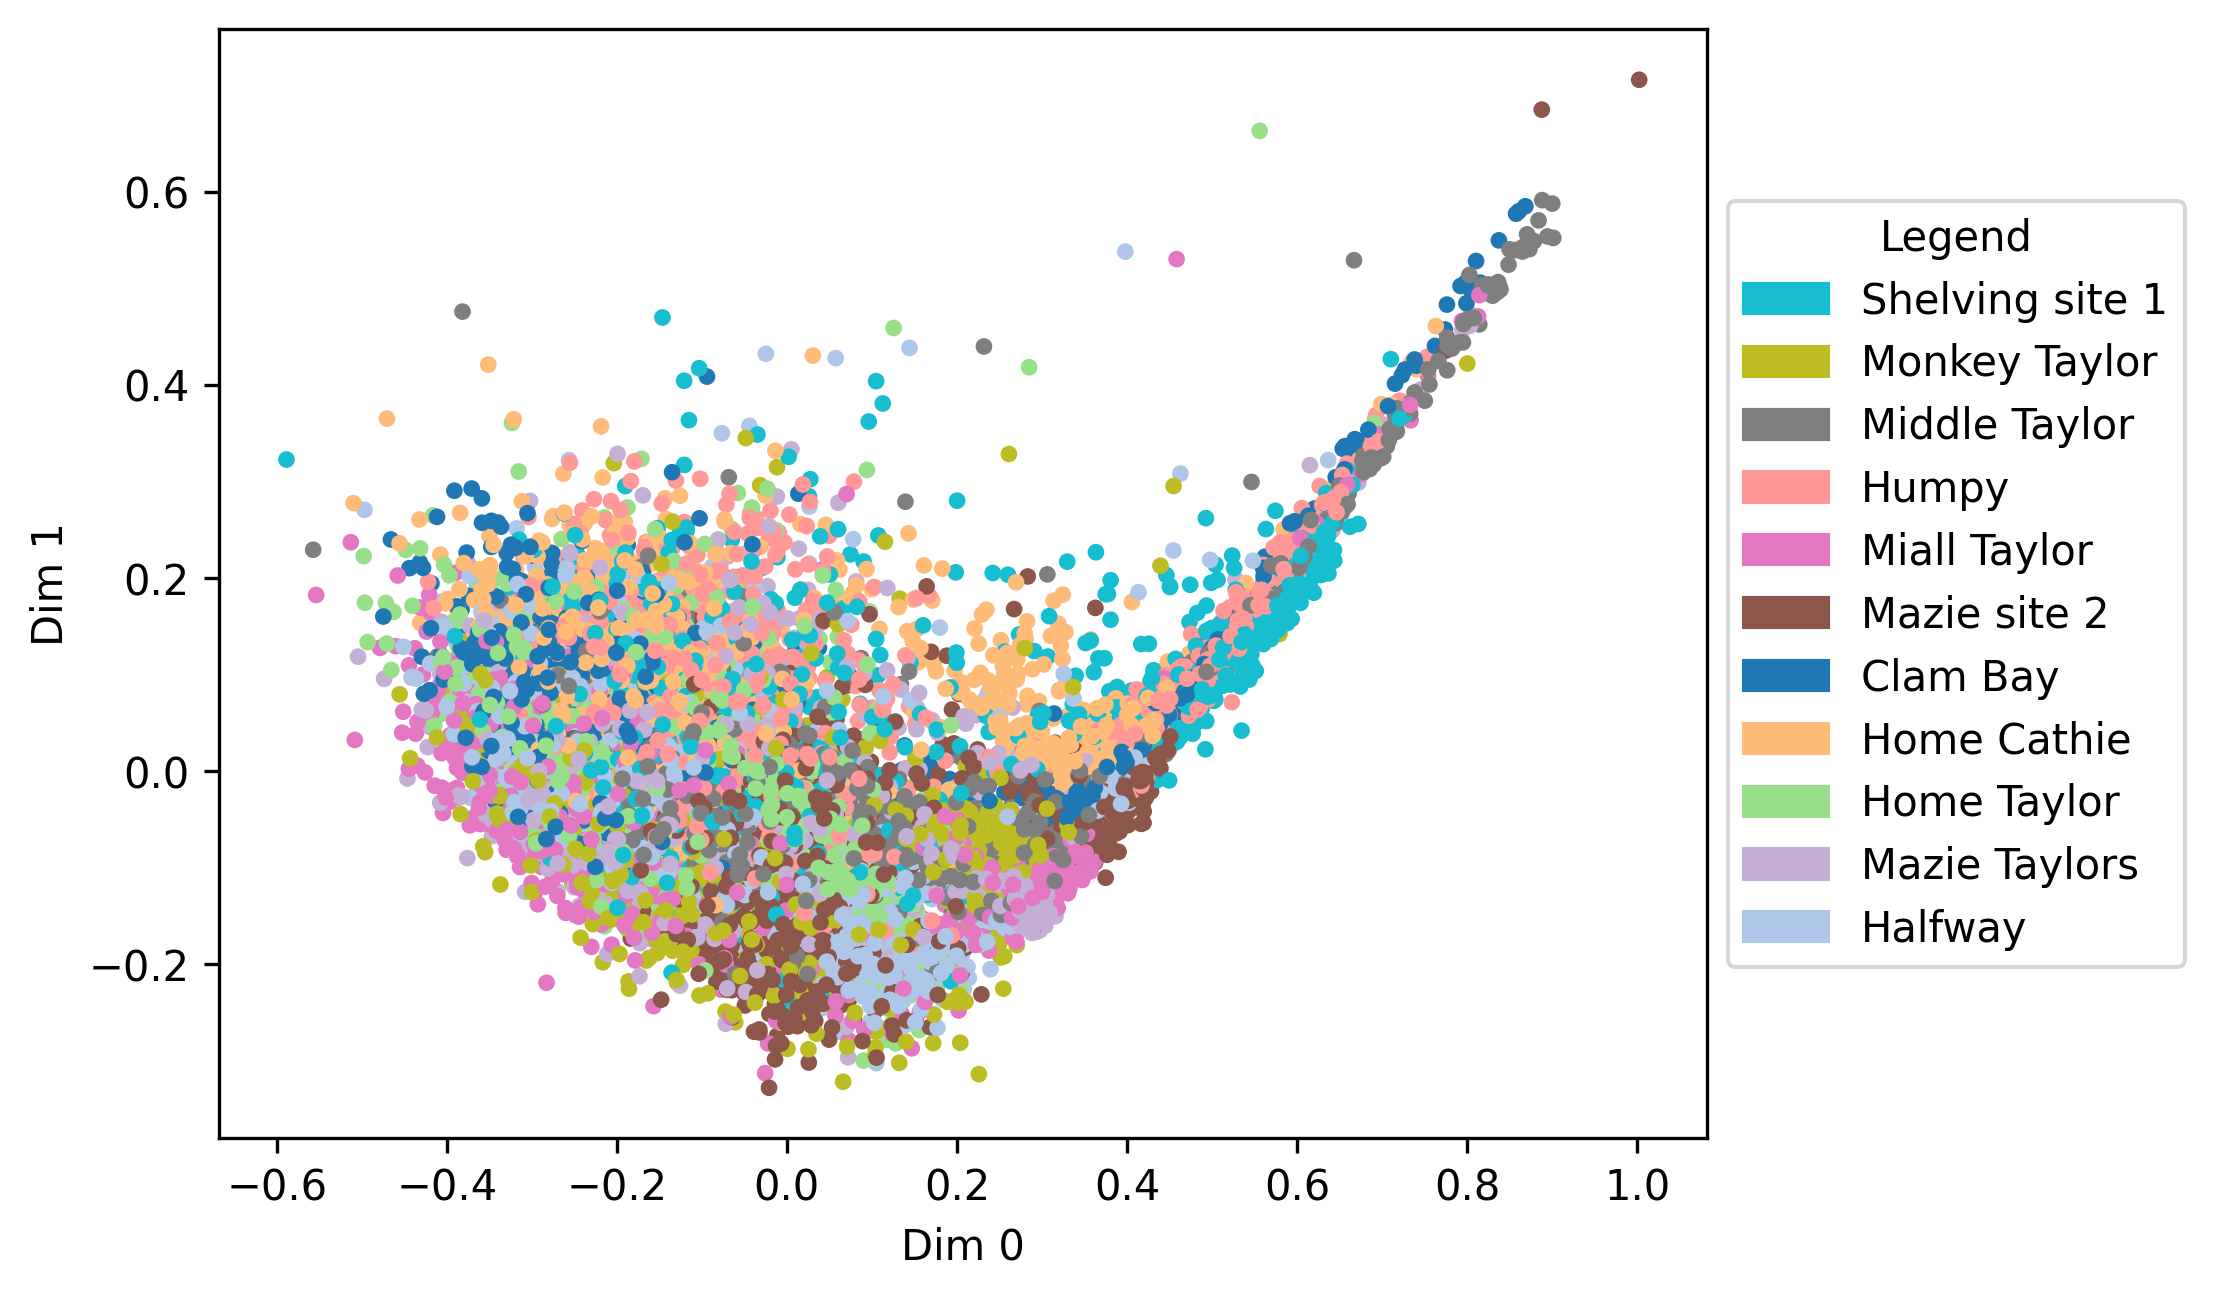

PCA plot for sunset_invertebrate band with sunset mask


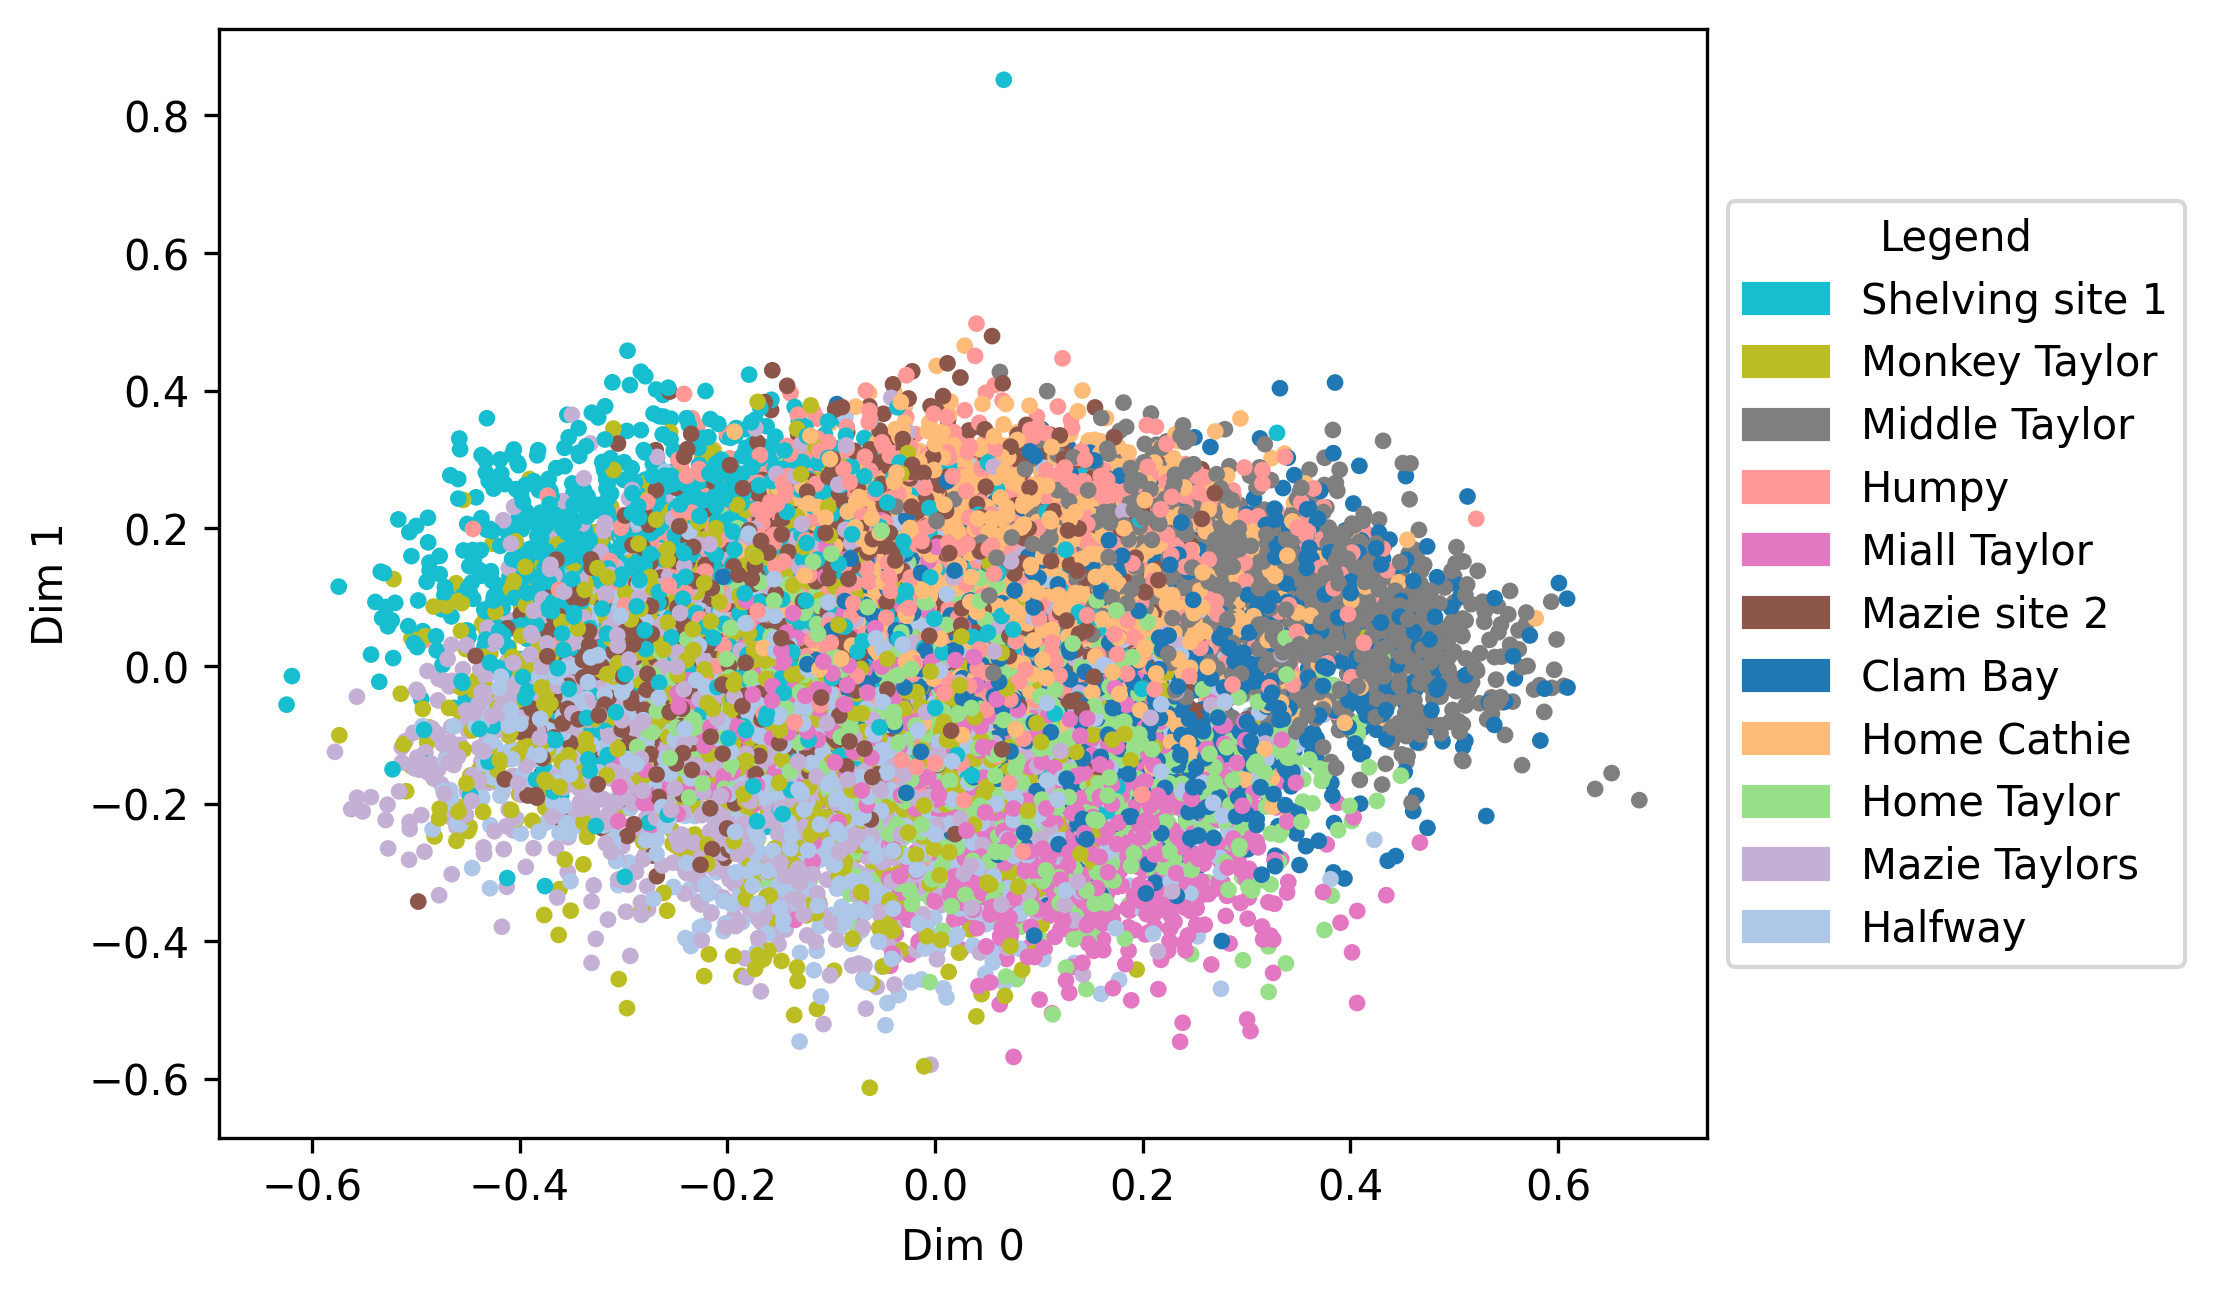

PCA plot for sunset_date_broad band with sunset_date mask


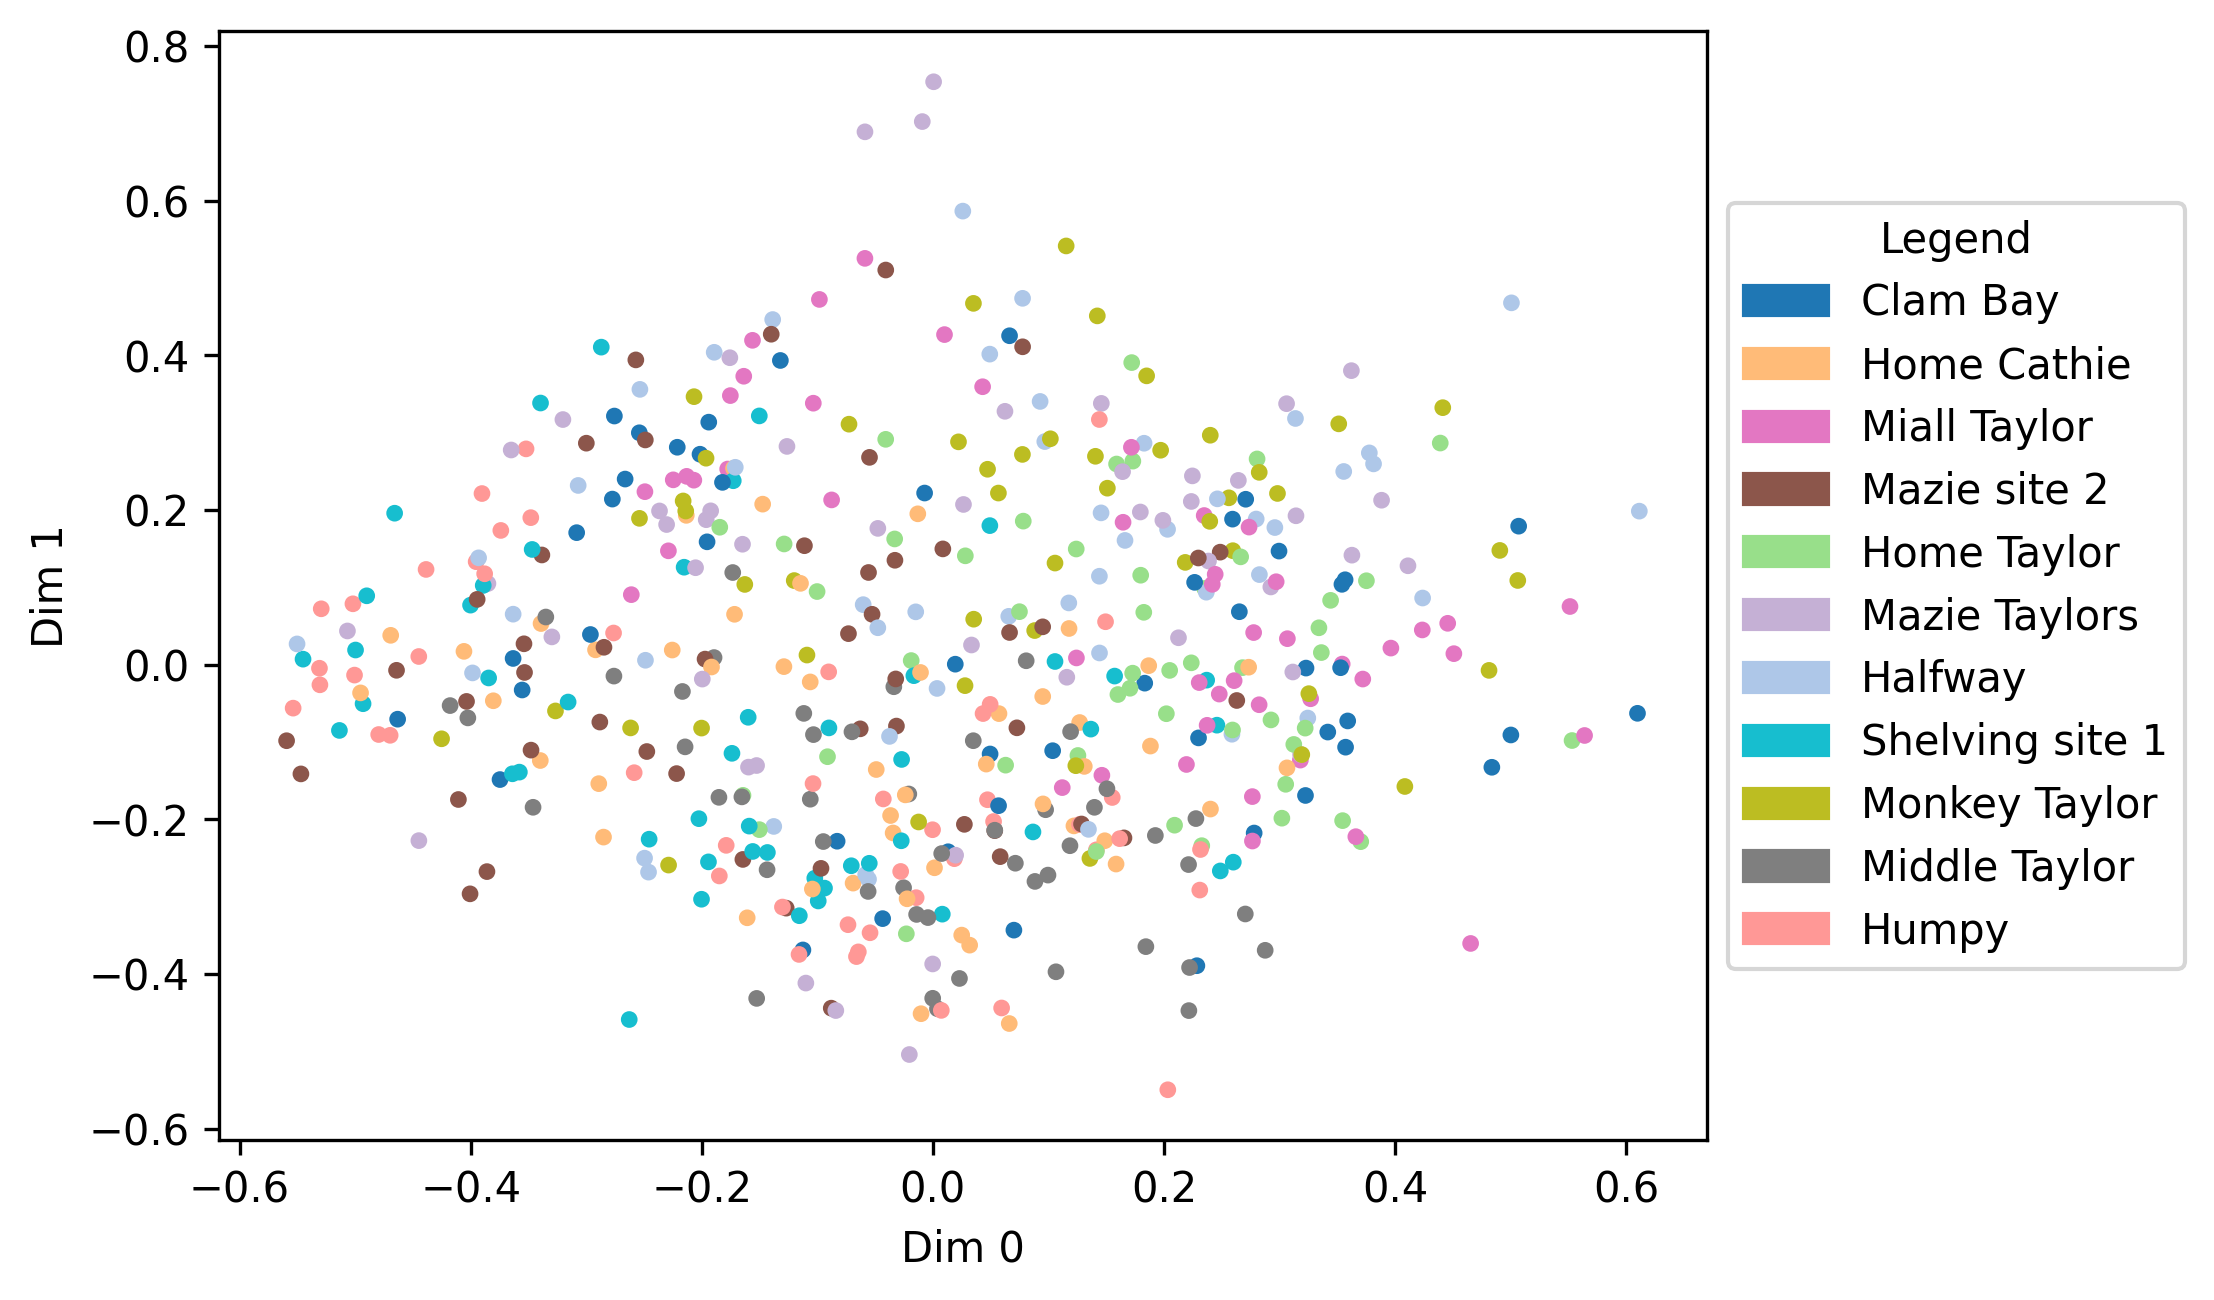

PCA plot for sunset_date_fish band with sunset_date mask


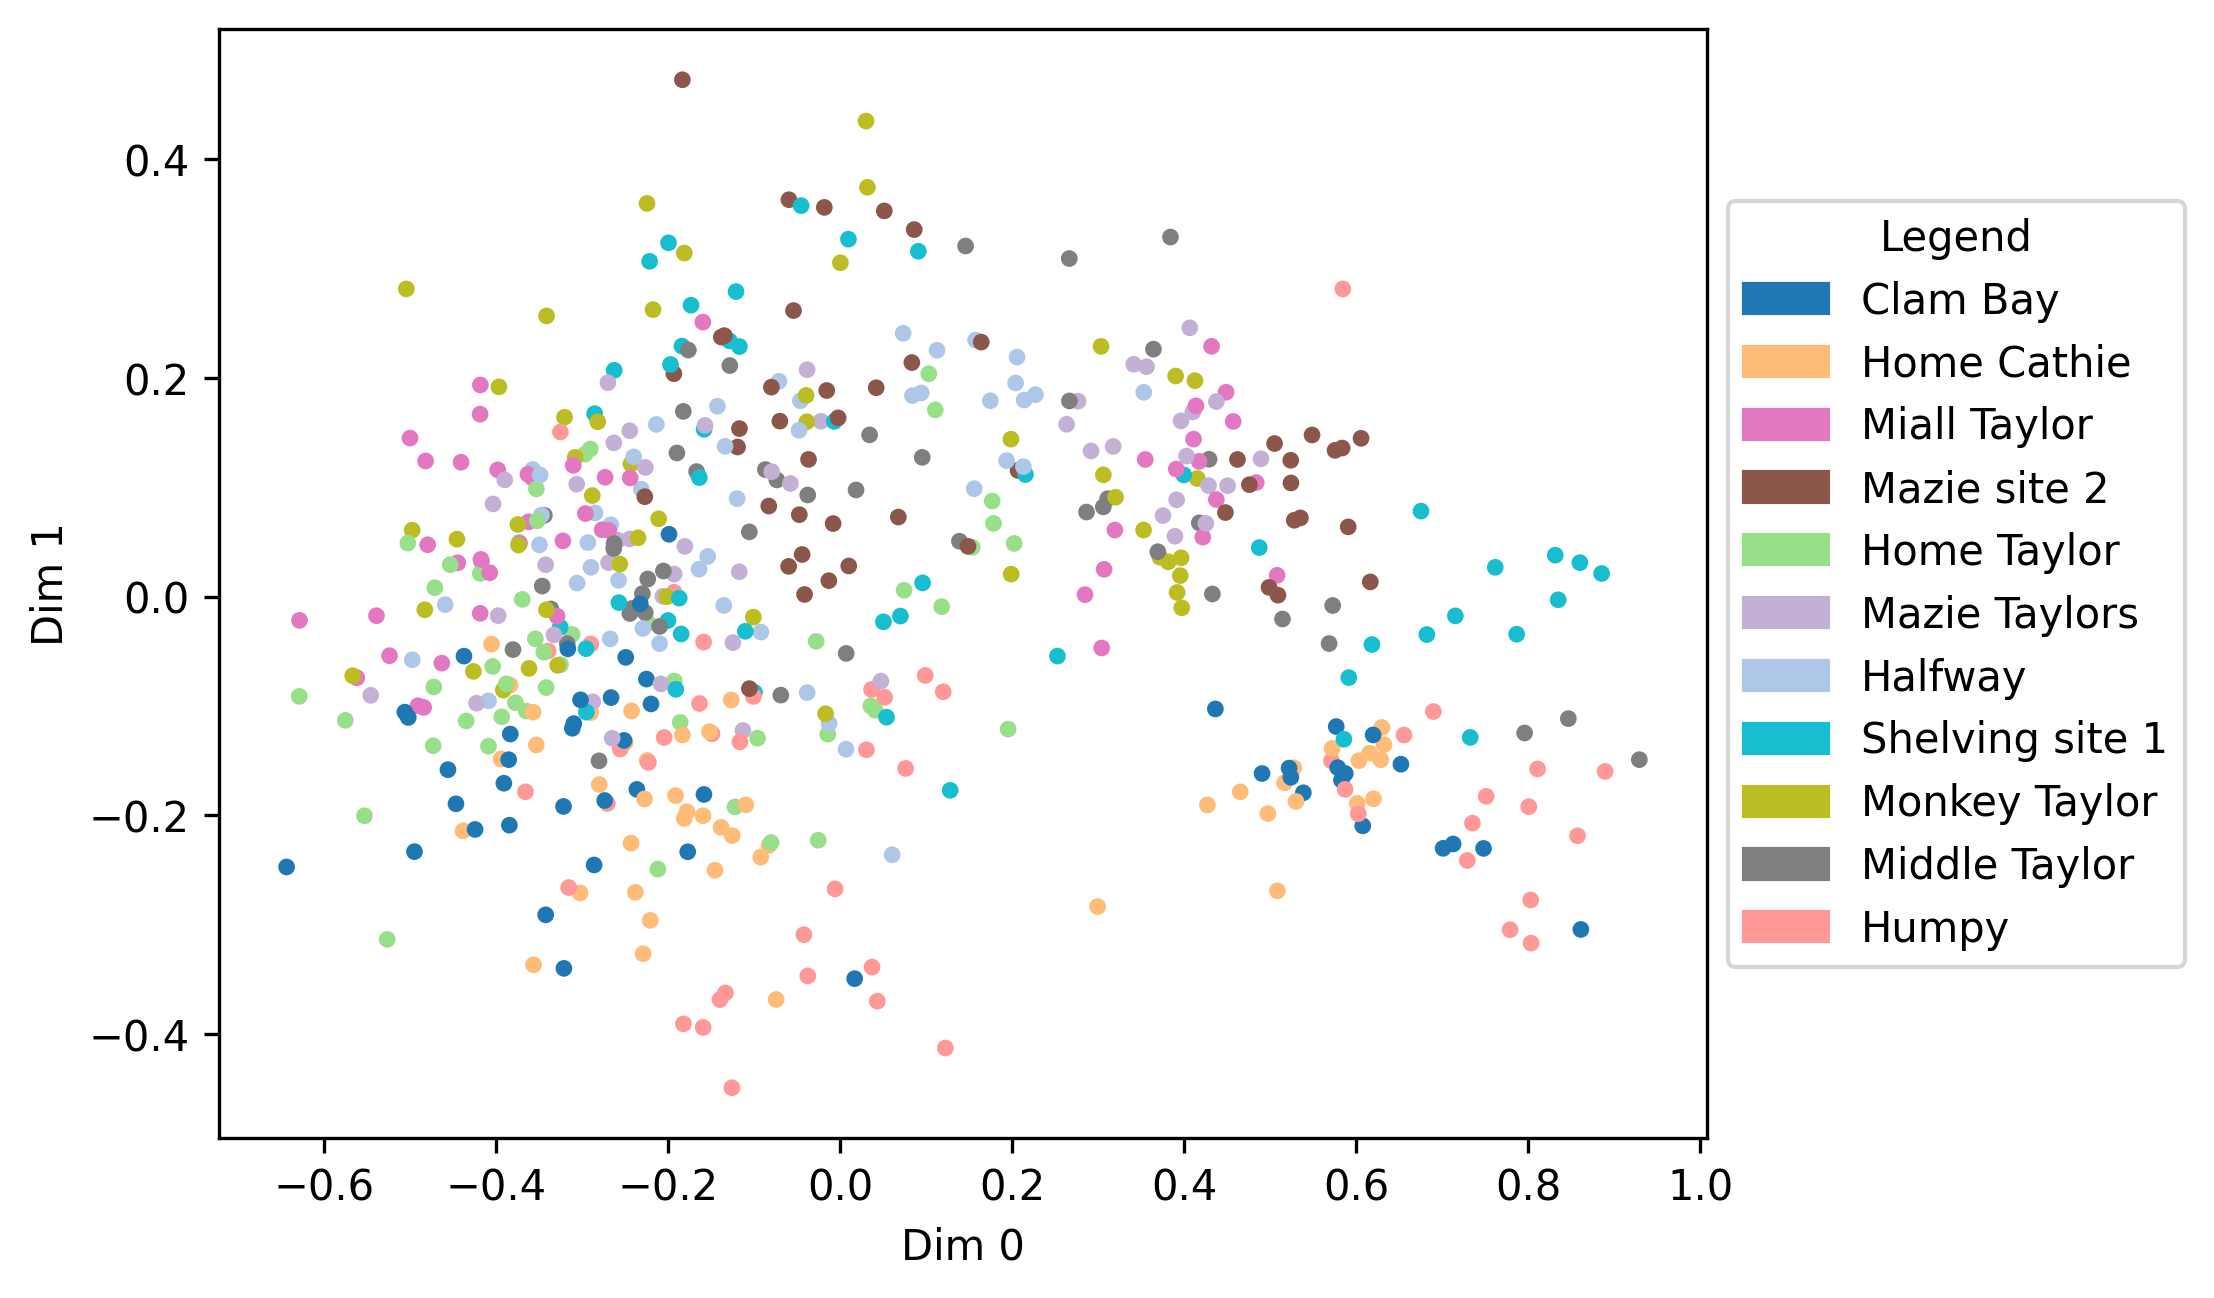

PCA plot for sunset_date_invertebrate band with sunset_date mask


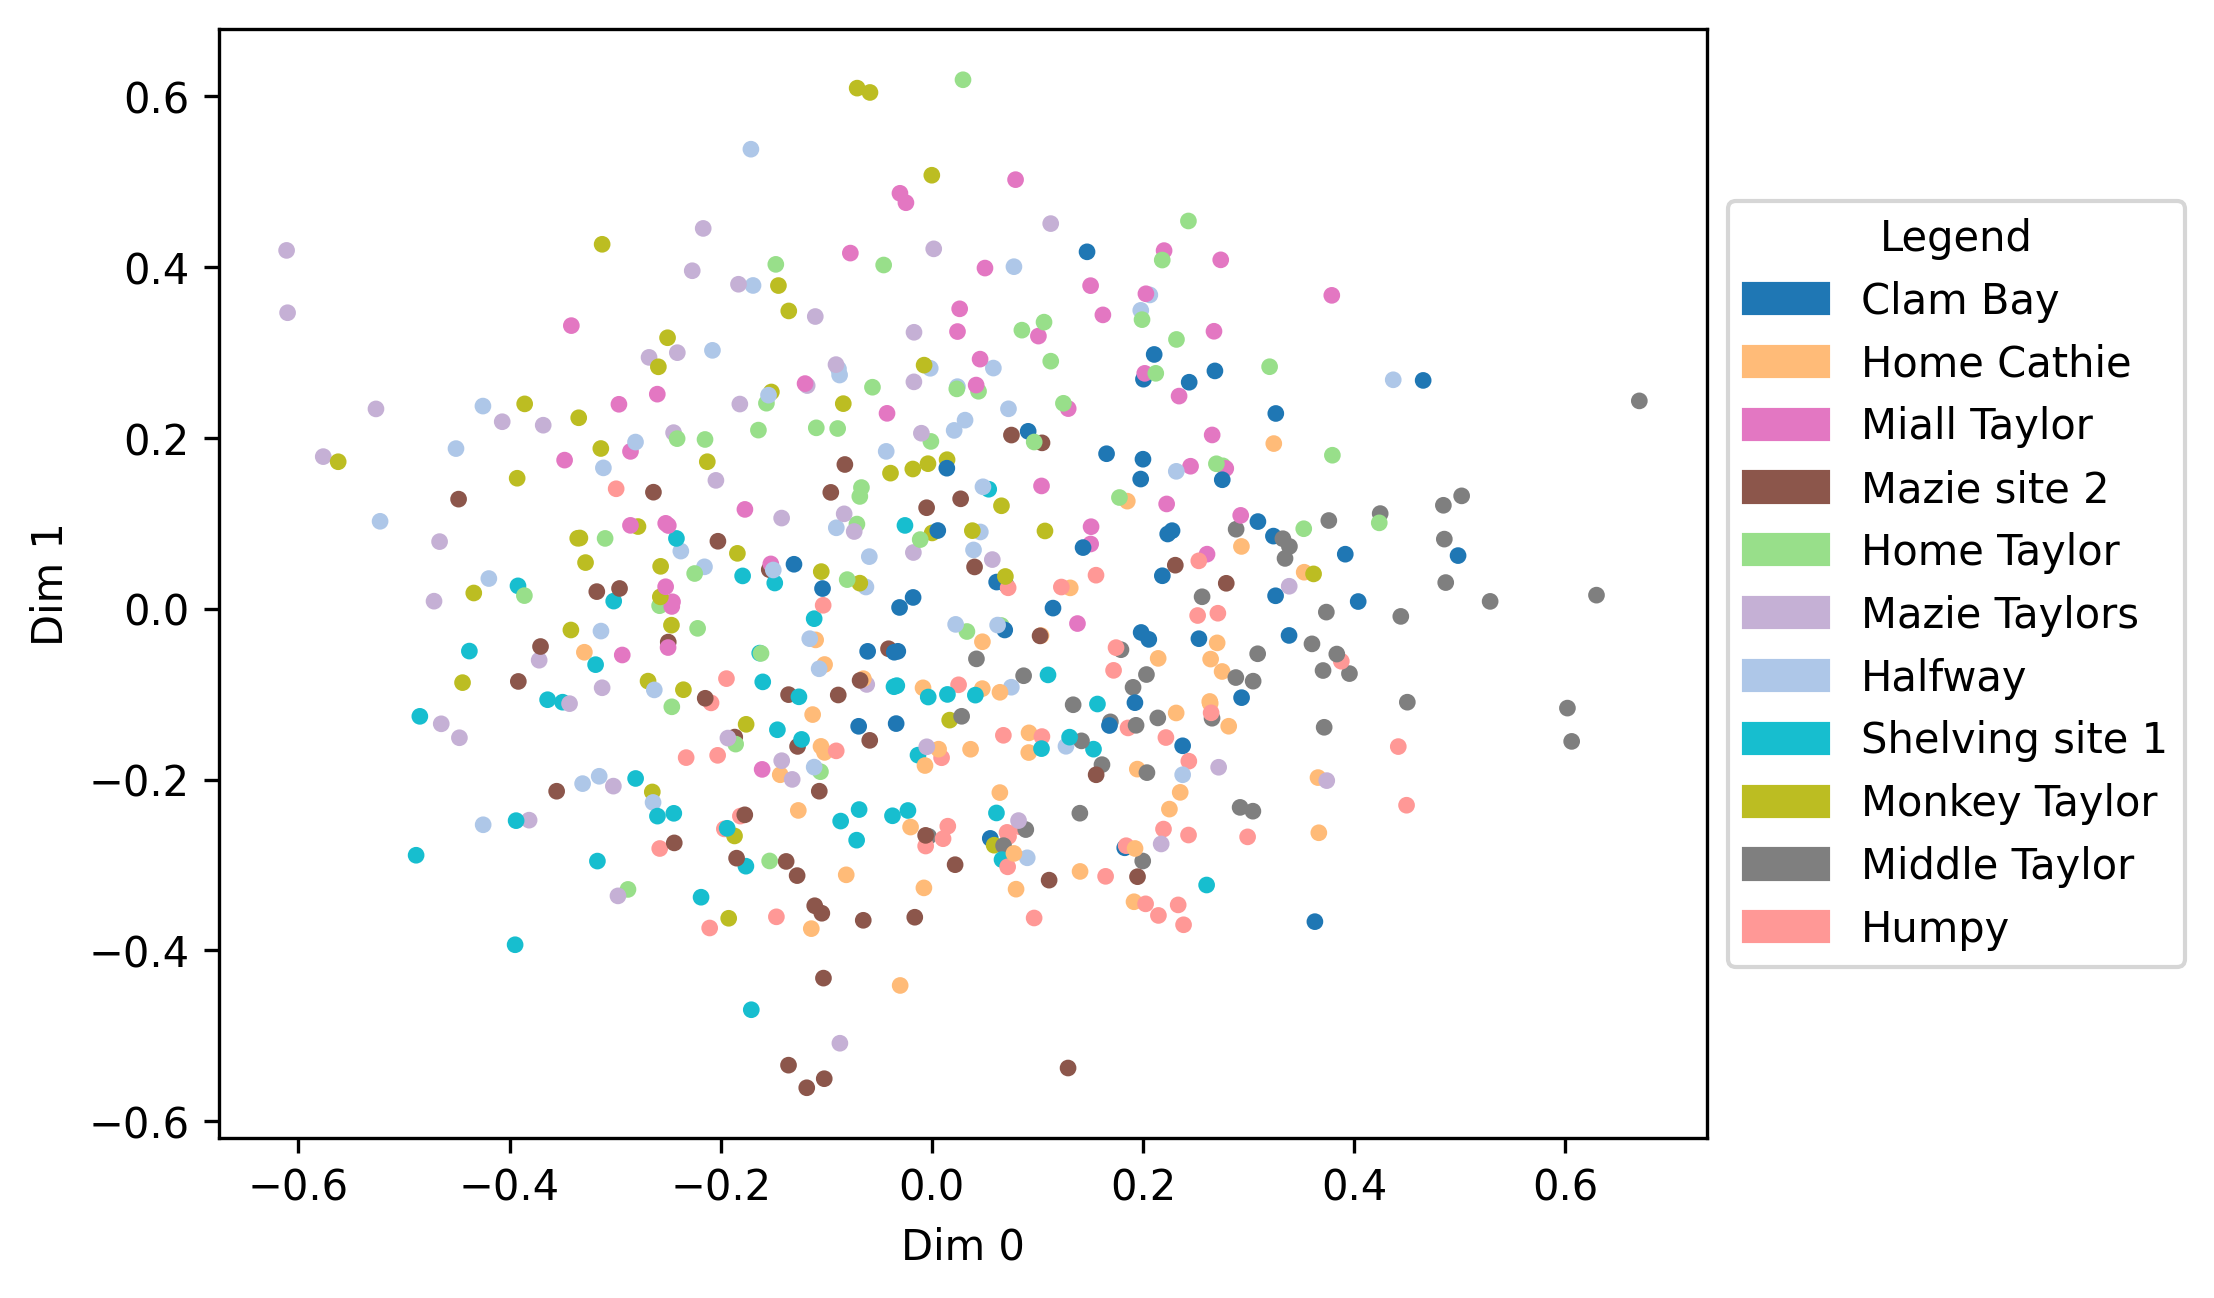

In [4]:
for mask in output_figs:
    for band, fig in output_figs[mask]:
        print(f"PCA plot for {band} band with {mask} mask")
        display(fig)